# Predecting the Sale Price of bulldozer using machine learning

In this notebook, we are going through an example machine learning project with the goal of predicting the sale price of bulldozers.

## Problem defination
> How well can we predict the  future sale price of bulldozers, giving its characterestics and previous example of how much similar bulldozers have been sold for ?

## Data
The data is downloaded from kaggle blue book of bulldozers competitions:

There are three main datasets:
* train, validation and test

## Evaluation
The goal for most regression evaluation metrics is to reduce the error. For example: our goal of this project is to build a machin learning model which minimises RMSLE.

## Features

Kaggle provide a data dict detailling all of the features of the dataset. you can view this data from kaggle.

## Experimentation

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [6]:
# Import training and validation set

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

<Axes: ylabel='Frequency'>

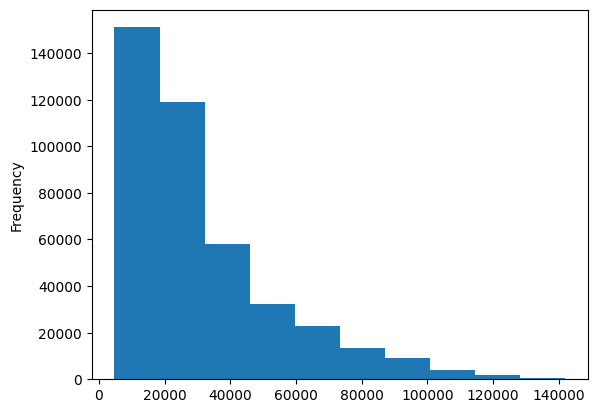

In [9]:
df.SalePrice.plot.hist()

### Parsing date

When we work with time sales data, we need to enrich time and date component as much as possible.

We can do that by telling pandas, which our column has the date in it using the `parse_dates` parameters.

In [10]:
# import data again but this time parse date

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


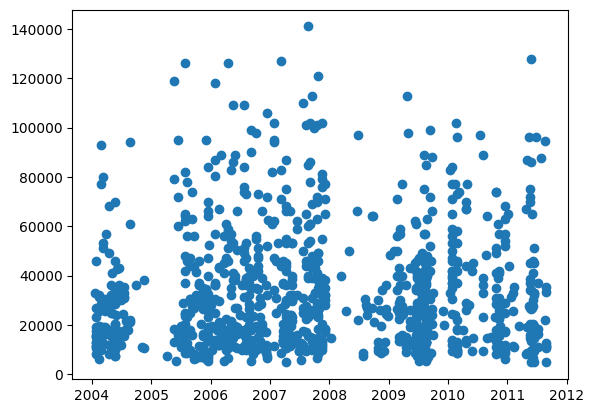

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### sort dataframe by sale date

When working with timeseries data, it is good idea to sort it by date.

In [14]:
# sort dataframe in date order

df.sort_values(by=["saledate"], inplace=True, ascending=True)

In [15]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [16]:
df.saledate.tail(20)

406079   2012-04-28
409783   2012-04-28
411522   2012-04-28
412218   2012-04-28
411527   2012-04-28
406092   2012-04-28
409780   2012-04-28
406167   2012-04-28
411334   2012-04-28
412164   2012-04-28
409202   2012-04-28
408976   2012-04-28
411695   2012-04-28
411319   2012-04-28
408889   2012-04-28
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, dtype: datetime64[ns]

### make a copy of original dataframe

we make a copy of original dataframe when we manipulate the copy, we've still got our original data.

In [17]:
# make a copy 


df_tmp = df.copy()

In [18]:
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Add datetime parameter for `saledate` column

In [19]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [20]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [21]:
# now we enriched our dataframe with datetime features we can remove `saledate`
df_tmp.drop("saledate", axis=1, inplace=True)

In [22]:
# check the values of different columns. 

df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

We have enough done EDA. (we could always do more) but lets start to do some model-driven EDA.

### convert strings to categoires

One way we can turn all of our data into numbers is by converting them into pandas categories.

In [23]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [24]:
df_tmp.sort_index(axis=1, inplace=True)

In [25]:
df_tmp.head().T

,205615,274835,141296,212552,62755
Backhoe_Mounting,None or Unspecified,NaN,None or Unspecified,NaN,None or Unspecified
Blade_Extension,NaN,NaN,NaN,NaN,NaN
Blade_Type,Straight,NaN,Straight,NaN,PAT
Blade_Width,NaN,NaN,NaN,NaN,NaN
Coupler,NaN,None or Unspecified,NaN,None or Unspecified,NaN
Coupler_System,NaN,NaN,NaN,NaN,NaN
Differential_Type,NaN,Standard,NaN,Standard,NaN
Drive_System,NaN,NaN,NaN,NaN,NaN
Enclosure,OROPS,OROPS,OROPS,EROPS,OROPS
Enclosure_Type,NaN,NaN,NaN,NaN,NaN


In [26]:
df_tmp.dtypes

Backhoe_Mounting             object
Blade_Extension              object
Blade_Type                   object
Blade_Width                  object
Coupler                      object
Coupler_System               object
Differential_Type            object
Drive_System                 object
Enclosure                    object
Enclosure_Type               object
Engine_Horsepower            object
Forks                        object
Grouser_Tracks               object
Grouser_Type                 object
Hydraulics                   object
Hydraulics_Flow              object
MachineHoursCurrentMeter    float64
MachineID                     int64
ModelID                       int64
Pad_Type                     object
Pattern_Changer              object
ProductGroup                 object
ProductGroupDesc             object
ProductSize                  object
Pushblock                    object
Ride_Control                 object
Ripper                       object
SalePrice                   

In [27]:
df_tmp[df_tmp.select_dtypes(include=['object']).columns] = df_tmp.select_dtypes(include=['object']).astype('category')

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Backhoe_Mounting          80712 non-null   category
 1   Blade_Extension           25983 non-null   category
 2   Blade_Type                81875 non-null   category
 3   Blade_Width               25983 non-null   category
 4   Coupler                   220679 non-null  category
 5   Coupler_System            44974 non-null   category
 6   Differential_Type         71564 non-null   category
 7   Drive_System              107087 non-null  category
 8   Enclosure                 412364 non-null  category
 9   Enclosure_Type            25983 non-null   category
 10  Engine_Horsepower         25983 non-null   category
 11  Forks                     197715 non-null  category
 12  Grouser_Tracks            44875 non-null   category
 13  Grouser_Type              102

In [29]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [30]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas categories, we have now way to access all of our data in the form of numbers, 

but we still have a bunch of missing data. 

In [31]:
# check the missing data

df_tmp.isna().sum()/len(df_tmp)

Backhoe_Mounting            0.804428
Blade_Extension             0.937041
Blade_Type                  0.801610
Blade_Width                 0.937041
Coupler                     0.465277
Coupler_System              0.891024
Differential_Type           0.826595
Drive_System                0.740520
Enclosure                   0.000809
Enclosure_Type              0.937041
Engine_Horsepower           0.937041
Forks                       0.520921
Grouser_Tracks              0.891264
Grouser_Type                0.752378
Hydraulics                  0.200062
Hydraulics_Flow             0.891264
MachineHoursCurrentMeter    0.642586
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.803498
Pattern_Changer             0.752213
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.524851
Pushblock                   0.937041
Ride_Control                0.629928
Ripper                      0.740864
S

### save preprocessed data

In [32]:
# export current tmp dataframe

df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)

In [33]:
# import preprocessed data
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)
df_tmp.head()

,Backhoe_Mounting,Blade_Extension,Blade_Type,Blade_Width,Coupler,Coupler_System,Differential_Type,Drive_System,Enclosure,Enclosure_Type,...,fiModelDescriptor,fiModelSeries,fiProductClassDesc,fiSecondaryDesc,saleDay,saleDayOfWeek,saleDayOfYear,saleMonth,saleYear,state
0,None or Unspecified,NaN,Straight,NaN,NaN,NaN,NaN,NaN,OROPS,NaN,...,NaN,NaN,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",NaN,17,1,17,1,1989,Texas
1,NaN,NaN,NaN,NaN,None or Unspecified,NaN,Standard,NaN,OROPS,NaN,...,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,NaN,31,1,31,1,1989,Florida
2,None or Unspecified,NaN,Straight,NaN,NaN,NaN,NaN,NaN,OROPS,NaN,...,NaN,NaN,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",G,31,1,31,1,1989,Florida
3,NaN,NaN,NaN,NaN,None or Unspecified,NaN,Standard,NaN,EROPS,NaN,...,NaN,NaN,Wheel Loader - Unidentified,NaN,31,1,31,1,1989,Florida
4,None or Unspecified,NaN,PAT,NaN,NaN,NaN,NaN,NaN,OROPS,NaN,...,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",B,31,1,31,1,1989,Florida


In [34]:
df_tmp.head().T

,0,1,2,3,4
Backhoe_Mounting,None or Unspecified,NaN,None or Unspecified,NaN,None or Unspecified
Blade_Extension,NaN,NaN,NaN,NaN,NaN
Blade_Type,Straight,NaN,Straight,NaN,PAT
Blade_Width,NaN,NaN,NaN,NaN,NaN
Coupler,NaN,None or Unspecified,NaN,None or Unspecified,NaN
Coupler_System,NaN,NaN,NaN,NaN,NaN
Differential_Type,NaN,Standard,NaN,Standard,NaN
Drive_System,NaN,NaN,NaN,NaN,NaN
Enclosure,OROPS,OROPS,OROPS,EROPS,OROPS
Enclosure_Type,NaN,NaN,NaN,NaN,NaN


## fill missing values

### fill numeric missing values first

In [35]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

MachineHoursCurrentMeter
MachineID
ModelID
SalePrice
SalesID
YearMade
auctioneerID
datasource
saleDay
saleDayOfWeek
saleDayOfYear
saleMonth
saleYear


In [36]:
# check for which numeric columns have null value
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter
auctioneerID


In [37]:
# fill the numrice columns hacing null value with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binery column which tells us if the data is missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #fill the missing values with median
            df_tmp[label] = content.fillna(content.median())

In [38]:
df_tmp.isna().sum()

Backhoe_Mounting                       331986
Blade_Extension                        386715
Blade_Type                             330823
Blade_Width                            386715
Coupler                                192019
Coupler_System                         367724
Differential_Type                      341134
Drive_System                           305611
Enclosure                                 334
Enclosure_Type                         386715
Engine_Horsepower                      386715
Forks                                  214983
Grouser_Tracks                         367823
Grouser_Type                           310505
Hydraulics                              82565
Hydraulics_Flow                        367823
MachineHoursCurrentMeter                    0
MachineID                                   0
ModelID                                     0
Pad_Type                               331602
Pattern_Changer                        310437
ProductGroup                      

### filling and tuning categorical variables in numbers

In [39]:
# check for columns which are not numeric

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Backhoe_Mounting
Blade_Extension
Blade_Type
Blade_Width
Coupler
Coupler_System
Differential_Type
Drive_System
Enclosure
Enclosure_Type
Engine_Horsepower
Forks
Grouser_Tracks
Grouser_Type
Hydraulics
Hydraulics_Flow
Pad_Type
Pattern_Changer
ProductSize
Pushblock
Ride_Control
Ripper
Scarifier
Steering_Controls
Stick
Stick_Length
Thumb
Tip_Control
Tire_Size
Track_Type
Transmission
Travel_Controls
Turbocharged
Undercarriage_Pad_Width
UsageBand
fiModelDescriptor
fiModelSeries
fiSecondaryDesc


In [40]:
# turn categorical variables in numbers and fill missing 

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a binery column to indicate whether sample has missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #turn categories in numbers and add one
        df_tmp[label] = pd.Categorical(content).codes + 1

In [41]:
df_tmp.isna().sum()

Backhoe_Mounting                 0
Blade_Extension                  0
Blade_Type                       0
Blade_Width                      0
Coupler                          0
                                ..
fiModelDescriptor_is_missing     0
fiModelSeries_is_missing         0
fiProductClassDesc_is_missing    0
fiSecondaryDesc_is_missing       0
state_is_missing                 0
Length: 103, dtype: int64

Now all of data in numeric with no missing value. Now we are able to build machine leanring model

In [42]:
df_tmp.head()

,Backhoe_Mounting,Blade_Extension,Blade_Type,Blade_Width,Coupler,Coupler_System,Differential_Type,Drive_System,Enclosure,Enclosure_Type,...,Turbocharged_is_missing,Undercarriage_Pad_Width_is_missing,UsageBand_is_missing,fiBaseModel_is_missing,fiModelDesc_is_missing,fiModelDescriptor_is_missing,fiModelSeries_is_missing,fiProductClassDesc_is_missing,fiSecondaryDesc_is_missing,state_is_missing
0,1,0,8,0,0,0,0,0,6,0,...,True,True,True,False,False,True,True,False,True,False
1,0,0,0,0,3,0,4,0,6,0,...,True,True,True,False,False,True,True,False,True,False
2,1,0,8,0,0,0,0,0,6,0,...,True,True,True,False,False,True,True,False,False,False
3,0,0,0,0,3,0,4,0,1,0,...,True,True,True,False,False,True,True,False,True,False
4,1,0,6,0,0,0,0,0,6,0,...,True,True,True,False,False,True,True,False,False,False


In [43]:
len(df_tmp)

412698

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [45]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9820466969254289

**Question**

* Why does the above metric hold water?(why is not metric reliable)

### splitting data into train and validation set

In [46]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

In [47]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

# building an evaluation function

In [48]:
# create evaluation function (the competition use RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


# create function to evaluate model on different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE":  rmsle(y_valid, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_valid, val_preds),
    }
    return scores


In [49]:
# # testing our model on a subset
# %%time
# model = RandomForestRegressor(
#     n_jobs=-1,
#     random_state=42,
#     n_estimators=10
# )

# model.fit(X_train, y_train)

In [50]:
# change max_samples values

model = RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
    n_estimators=10
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [51]:
scores = show_scores(model)
print(scores)

{'Training MAE': 1794.234001620442, 'Valid MAE': 6418.976479737319, 'Training RMSLE': 0.09803585277877161, 'Valid RMSLE': 0.2676445784624003, 'Training R^2': 0.9819418464552292, 'Valid R^2': 0.8608116109077562}


### Hyperparameter tuning with Randomized search CV

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# diff randomforestregressor hyper parameters
rs_grid = {
    "n_estimators": np.arange(10, 50, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": ["sqrt"]
}

# instantiate randomizedsearchcv
rs_model = RandomizedSearchCV(
    RandomForestRegressor(
        n_jobs=-1,
        random_state=42
    ),
    param_distributions=rs_grid,
    cv=5,
    verbose=True,
    n_iter=2
)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40])},
                   verbose=True)

In [53]:
# find best model

rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': None}

In [54]:
# evaluaate the model

scores = show_scores(rs_model)
print(scores)

{'Training MAE': 4146.243533187554, 'Valid MAE': 6736.393436104518, 'Training RMSLE': 0.19634768016283402, 'Valid RMSLE': 0.278725852649144, 'Training R^2': 0.9228202736893145, 'Valid R^2': 0.8548556434202013}


In [55]:
## most ideal hyper parameters

ideal_model = RandomForestRegressor(
    n_estimators=10,
    min_samples_leaf=1,
    min_samples_split=14,
    max_features=0.5,
    n_jobs=-1,
    random_state=42
)


ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=10,
                      n_jobs=-1, random_state=42)

In [56]:
show_scores(ideal_model)

{'Training MAE': 3090.972826681824,
 'Valid MAE': 6160.439025148514,
 'Training RMSLE': 0.15071489836571317,
 'Valid RMSLE': 0.2536455017730432,
 'Training R^2': 0.9543076419327426,
 'Valid R^2': 0.8728134813357062}

## make predictions on test data

In [57]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.sort_index(axis=1, inplace=True)
df_test.head()

,Backhoe_Mounting,Blade_Extension,Blade_Type,Blade_Width,Coupler,Coupler_System,Differential_Type,Drive_System,Enclosure,Enclosure_Type,...,auctioneerID,datasource,fiBaseModel,fiModelDesc,fiModelDescriptor,fiModelSeries,fiProductClassDesc,fiSecondaryDesc,saledate,state
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Wheel Drive,OROPS,NaN,...,3,121,580,580G,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,G,2012-05-03,Wyoming
1,NaN,NaN,NaN,NaN,None or Unspecified,NaN,Standard,NaN,EROPS,NaN,...,3,121,936,936,NaN,NaN,Wheel Loader - 135.0 to 150.0 Horsepower,NaN,2012-05-10,Virginia
2,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,EROPS w AC,NaN,...,3,121,EC210,EC210BLC,LC,NaN,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",B,2012-05-10,New Jersey
3,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,EROPS w AC,NaN,...,3,121,330,330CL,L,NaN,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",C,2012-05-10,New Jersey
4,None or Unspecified,NaN,PAT,NaN,NaN,NaN,NaN,NaN,OROPS,NaN,...,3,121,650,650K,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",K,2012-05-10,Florida


## preprocessing the test data (getting the test dataset in the same format as training dataset)

In [58]:
df_test[df_test.select_dtypes(include=['object']).columns] = df_test.select_dtypes(include=['object']).astype('category')

In [59]:
def preprocess_data(df):
    
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)
    


    # fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # add a binery column which tells us if the data is missing
                df[label+"_is_missing"] = pd.isnull(content)
                #fill the missing values with median
                df[label] = content.fillna(content.median())

    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # add a binery column to indicate whether sample has missing value
            df[label+"_is_missing"] = pd.isnull(content)
            #turn categories in numbers and add one
            df[label] = pd.Categorical(content).codes + 1
    # fill categorical missing data and turned categories in numbers
    return df

In [60]:
df_test = preprocess_data(df_test)
df_test.head()

,Backhoe_Mounting,Blade_Extension,Blade_Type,Blade_Width,Coupler,Coupler_System,Differential_Type,Drive_System,Enclosure,Enclosure_Type,...,Turbocharged_is_missing,Undercarriage_Pad_Width_is_missing,UsageBand_is_missing,fiBaseModel_is_missing,fiModelDesc_is_missing,fiModelDescriptor_is_missing,fiModelSeries_is_missing,fiProductClassDesc_is_missing,fiSecondaryDesc_is_missing,state_is_missing
0,0,0,0,0,0,0,0,4,3,0,...,False,True,False,False,False,True,True,False,False,False
1,0,0,0,0,3,0,3,0,1,0,...,True,True,False,False,False,True,True,False,True,False
2,0,0,0,0,3,0,0,0,2,0,...,True,False,False,False,False,False,True,False,False,False
3,0,0,0,0,3,0,0,0,2,0,...,True,False,False,False,False,False,True,False,False,False
4,1,0,4,0,0,0,0,0,3,0,...,True,True,False,False,False,True,True,False,False,False


In [61]:
# make predictions

# test_preds = ideal_model.predict(df_test)

In [62]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [63]:
# manually adjust df test

df_test["auctioneerID_is_missing"] = False

In [64]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [65]:
# Check feature names and their order
print(X_train.columns.tolist())

['Backhoe_Mounting', 'Blade_Extension', 'Blade_Type', 'Blade_Width', 'Coupler', 'Coupler_System', 'Differential_Type', 'Drive_System', 'Enclosure', 'Enclosure_Type', 'Engine_Horsepower', 'Forks', 'Grouser_Tracks', 'Grouser_Type', 'Hydraulics', 'Hydraulics_Flow', 'MachineHoursCurrentMeter', 'MachineID', 'ModelID', 'Pad_Type', 'Pattern_Changer', 'ProductGroup', 'ProductGroupDesc', 'ProductSize', 'Pushblock', 'Ride_Control', 'Ripper', 'SalesID', 'Scarifier', 'Steering_Controls', 'Stick', 'Stick_Length', 'Thumb', 'Tip_Control', 'Tire_Size', 'Track_Type', 'Transmission', 'Travel_Controls', 'Turbocharged', 'Undercarriage_Pad_Width', 'UsageBand', 'YearMade', 'auctioneerID', 'datasource', 'fiBaseModel', 'fiModelDesc', 'fiModelDescriptor', 'fiModelSeries', 'fiProductClassDesc', 'fiSecondaryDesc', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear', 'saleMonth', 'saleYear', 'state', 'MachineHoursCurrentMeter_is_missing', 'auctioneerID_is_missing', 'Backhoe_Mounting_is_missing', 'Blade_Extension_is_missi

In [66]:
# Check feature names and their order
print(df_test.columns.tolist())


['Backhoe_Mounting', 'Blade_Extension', 'Blade_Type', 'Blade_Width', 'Coupler', 'Coupler_System', 'Differential_Type', 'Drive_System', 'Enclosure', 'Enclosure_Type', 'Engine_Horsepower', 'Forks', 'Grouser_Tracks', 'Grouser_Type', 'Hydraulics', 'Hydraulics_Flow', 'MachineHoursCurrentMeter', 'MachineID', 'ModelID', 'Pad_Type', 'Pattern_Changer', 'ProductGroup', 'ProductGroupDesc', 'ProductSize', 'Pushblock', 'Ride_Control', 'Ripper', 'SalesID', 'Scarifier', 'Steering_Controls', 'Stick', 'Stick_Length', 'Thumb', 'Tip_Control', 'Tire_Size', 'Track_Type', 'Transmission', 'Travel_Controls', 'Turbocharged', 'Undercarriage_Pad_Width', 'UsageBand', 'YearMade', 'auctioneerID', 'datasource', 'fiBaseModel', 'fiModelDesc', 'fiModelDescriptor', 'fiModelSeries', 'fiProductClassDesc', 'fiSecondaryDesc', 'state', 'saleYear', 'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear', 'MachineHoursCurrentMeter_is_missing', 'Backhoe_Mounting_is_missing', 'Blade_Extension_is_missing', 'Blade_Type_is_missing

In [67]:
df_test.sort_index(axis=1, inplace=True)

In [68]:
# Check feature names and their order
print(df_test.columns.tolist())


['Backhoe_Mounting', 'Backhoe_Mounting_is_missing', 'Blade_Extension', 'Blade_Extension_is_missing', 'Blade_Type', 'Blade_Type_is_missing', 'Blade_Width', 'Blade_Width_is_missing', 'Coupler', 'Coupler_System', 'Coupler_System_is_missing', 'Coupler_is_missing', 'Differential_Type', 'Differential_Type_is_missing', 'Drive_System', 'Drive_System_is_missing', 'Enclosure', 'Enclosure_Type', 'Enclosure_Type_is_missing', 'Enclosure_is_missing', 'Engine_Horsepower', 'Engine_Horsepower_is_missing', 'Forks', 'Forks_is_missing', 'Grouser_Tracks', 'Grouser_Tracks_is_missing', 'Grouser_Type', 'Grouser_Type_is_missing', 'Hydraulics', 'Hydraulics_Flow', 'Hydraulics_Flow_is_missing', 'Hydraulics_is_missing', 'MachineHoursCurrentMeter', 'MachineHoursCurrentMeter_is_missing', 'MachineID', 'ModelID', 'Pad_Type', 'Pad_Type_is_missing', 'Pattern_Changer', 'Pattern_Changer_is_missing', 'ProductGroup', 'ProductGroupDesc', 'ProductGroupDesc_is_missing', 'ProductGroup_is_missing', 'ProductSize', 'ProductSize_is

In [69]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [70]:
# Align columns in df_test to match X_train
df_test = df_test[X_train.columns]


In [71]:
test_preds = ideal_model.predict(df_test)

In [72]:
test_preds

array([17056.55653557, 14275.28047932, 56712.53621379, ...,
       15168.39338235, 24086.08345902, 34741.13682155])

We made some predictions but not in same format in which kaggle wants

In [73]:
# format predictions in same format

df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17056.556536
1,1227844,14275.280479
2,1227847,56712.536214
3,1227848,69879.278309
4,1227863,53898.255971
...,...,...
12452,6643171,36417.043651
12453,6643173,21588.416986
12454,6643184,15168.393382
12455,6643186,24086.083459


In [74]:
# export prediciton to csv

df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv")

## feature importance

this seeks to figure out which different attributes of the data were most important when it comes to predicting target variable.

In [75]:
# find feature importance of our model

ideal_model.feature_importances_

array([5.10556617e-04, 4.13238613e-05, 1.61127339e-03, 1.61436472e-02,
       7.50236240e-04, 6.75597373e-03, 3.34715765e-04, 3.65246380e-03,
       3.84894556e-02, 8.10914928e-03, 6.19286046e-05, 3.96821346e-04,
       3.46697990e-06, 3.85350596e-04, 1.25185229e-03, 3.13898753e-03,
       3.93160413e-03, 2.31809120e-02, 3.61647125e-02, 5.17614812e-05,
       7.04177383e-04, 1.15070356e-03, 1.39551160e-03, 1.68141849e-01,
       9.99774654e-04, 5.92024622e-04, 3.40666737e-03, 3.32513103e-02,
       1.16548253e-04, 2.10617531e-04, 1.54215249e-04, 2.04017406e-03,
       5.46843613e-04, 2.27885524e-04, 1.23199155e-02, 1.03458962e-03,
       8.48990129e-04, 3.40647252e-03, 2.71947462e-05, 7.95870170e-04,
       1.01558326e-03, 2.21686311e-01, 3.41139258e-03, 2.98788467e-03,
       6.27955958e-02, 3.07136733e-02, 1.17578998e-02, 3.84493653e-03,
       4.13599568e-02, 6.78761010e-02, 5.62719496e-03, 2.92839415e-03,
       9.77835288e-03, 3.64836552e-03, 7.33669268e-02, 5.93654647e-03,
      

In [76]:
# helper funciton for ploting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame(
        {"features": columns,
        "feature_importances": importances}
    ).sort_values("feature_importances", ascending=False).reset_index(drop=True))

    # plot the dataframe we created
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

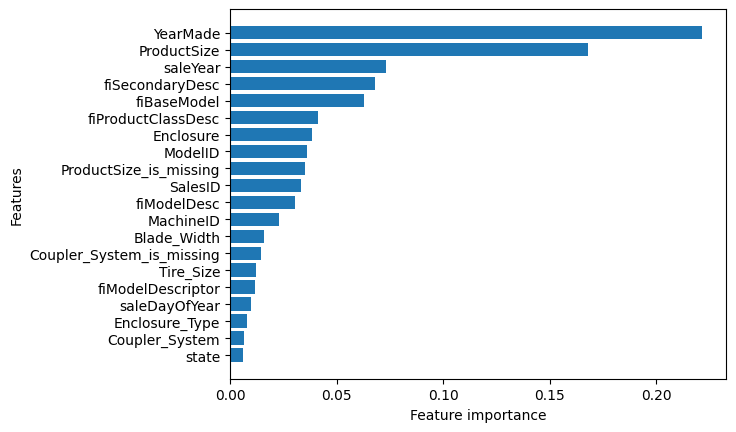

In [77]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Question to finish**

why might knowing the future importance of a trained machine learning model be helpful ?

**Final Challange**

what other machine learning models could you try on a dataset ?